# Appendix XIV.

## Evaluation of the classification task by 
## Recurrent Neural Networks (GRU and LSTM)


## Tick Data with Dukastcopy
## Data for 2020 year


### Trend(1) or Flat(0) 

##### Normalisation of volumes - based on a maximum of 10 lots (the main number of lots). The interval (from 10 to 5000 lots) are equated to 10 lots (those to 1 after normalisation)
##### We normalise the intervals between ticks - based on a maximum of 20,000 milliseconds (20 seconds) (the main number of intervals). The interval (from 20,000) are equated to 20,000 milliseconds (those to 1 after normalisation)

In [1]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

import numpy as np                  
import pandas as pd  

import random

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
print(tf.__version__)

2.10.0-dev20220604


In [4]:
# Progress bar
from tqdm import tqdm

In [ ]:
# COLABORATE
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

In [5]:
# Set seed to repeat results for random number generator
# tk we use stachostic optimization methods
np.random.seed(42)

### Data 

In [ ]:
# COLABORATE
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from google.colab import drive
drive.mount('/content/grive', force_remount=True)

In [ ]:
# COLABORATE
!ls

In [6]:
data = pd.read_csv('/Users/vital/Python_Code/_PhD_Code/Experiment-2/Results3/EURO_data_raw_common_norm_.csv')

print(data.head(n=5)) 
print(data[-5:]) 

       Ask      Bid  Vol_Bid_N  Vol_Ask_N  DateDelta1_N  Goal  Point  Point1
0  1.12160  1.12106      0.075    0.00937       0.00000     8      1       8
1  1.12160  1.12120      0.075    0.00937       0.21775     8      0       0
2  1.12160  1.12117      0.075    0.00937       0.06845     8      0       0
3  1.12161  1.12123      0.075    0.08400       0.03000     8      0       0
4  1.12161  1.12120      0.075    0.08400       0.00505     8      0       0
              Ask      Bid  Vol_Bid_N  Vol_Ask_N  DateDelta1_N  Goal  Point  \
16586025  1.12337  1.12333      0.506      0.075       0.00505     8      0   
16586026  1.12338  1.12333      0.394      0.157       0.00505     8      0   
16586027  1.12337  1.12333      0.394      0.075       0.32845     8      0   
16586028  1.12338  1.12333      0.394      0.202       0.22760     8      0   
16586029  1.12338  1.12334      0.037      0.150       0.19405     8      0   

          Point1  
16586025       0  
16586026       0  
165860

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586030 entries, 0 to 16586029
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Ask           float64
 1   Bid           float64
 2   Vol_Bid_N     float64
 3   Vol_Ask_N     float64
 4   DateDelta1_N  float64
 5   Goal          int64  
 6   Point         int64  
 7   Point1        int64  
dtypes: float64(5), int64(3)
memory usage: 1012.3 MB


In [8]:
# downsising

data['Ask']          =pd.to_numeric(data['Ask'],downcast='float')
data['Bid']          =pd.to_numeric(data['Bid'],downcast='float')
data['Vol_Bid_N']    =pd.to_numeric(data['Vol_Bid_N'],downcast='float')
data['Vol_Ask_N']    =pd.to_numeric(data['Vol_Ask_N'],downcast='float')
data['DateDelta1_N'] =pd.to_numeric(data['DateDelta1_N'],downcast='float')

data['Goal']         = pd.to_numeric(data['Goal'],downcast='integer')
data['Point']        = pd.to_numeric(data['Point'],downcast='integer')
data['Point1']       = pd.to_numeric(data['Point1'],downcast='integer')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586030 entries, 0 to 16586029
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Ask           float32
 1   Bid           float32
 2   Vol_Bid_N     float32
 3   Vol_Ask_N     float32
 4   DateDelta1_N  float32
 5   Goal          int8   
 6   Point         int8   
 7   Point1        int8   
dtypes: float32(5), int8(3)
memory usage: 363.8 MB


In [9]:
data['Point'].value_counts()

0    16533604
1       52426
Name: Point, dtype: int64

In [10]:
number1 = data['Point'].value_counts()
number1 

0    16533604
1       52426
Name: Point, dtype: int64

In [11]:
number1.iloc[1]

52426

In [12]:
n_small = number1.iloc[1]
n_small

52426

In [13]:
type(n_small)

numpy.int64

In [14]:
n_small = np.int32(n_small)

In [15]:
type(n_small)

numpy.int32

In [16]:
data.shape[0] 


16586030

In [17]:
type(data.shape[0])

int

In [18]:
n_small

52426

In [19]:
data.head()

,Ask,Bid,Vol_Bid_N,Vol_Ask_N,DateDelta1_N,Goal,Point,Point1
0,1.12160,1.12106,0.075,0.00937,0.00000,8,1,8
1,1.12160,1.12120,0.075,0.00937,0.21775,8,0,0
2,1.12160,1.12117,0.075,0.00937,0.06845,8,0,0
3,1.12161,1.12123,0.075,0.08400,0.03000,8,0,0
4,1.12161,1.12120,0.075,0.08400,0.00505,8,0,0


In [ ]:
data['Point'].loc[0]  = 0
data['Point1'].loc[0] = 0

data.head()

In [21]:
data['Point'].value_counts()

0    16533605
1       52425
Name: Point, dtype: int64

In [22]:
for i in tqdm(range(0,data.shape[0])):
    if (data['Point'].iloc[i] == 1):
        print(i)
     #   print(data['Point'].index[i])
        break
    continue


  0%|          | 76/16586030 [00:00<04:40, 59096.61it/s]

76


In [23]:
for i in tqdm(range(0,data.shape[0])):
    if (i > 200):
        break
    else: 
        if (data['Point'].iloc[i] == 1):
            print(i)
         #   print(data['Point'].index[i])
    continue

  0%|          | 201/16586030 [00:00<05:29, 50364.72it/s]

76
108
109


In [24]:
print(data['Point1'].iloc[76], '\n')
print(data['Point1'].iloc[108], '\n')
print(data['Point1'].iloc[109])

10 

5 

11


In [ ]:
data['Point'].loc[76]  = 0
data['Point1'].loc[76] = 0

data['Point'].loc[108]  = 0
data['Point1'].loc[108] = 0

data['Point'].loc[109]  = 0
data['Point1'].loc[109] = 0

In [26]:
for i in tqdm(range(0,data.shape[0])):
    if (data['Point'].iloc[i] == 1):
        print(i)
        break
    continue


  0%|          | 222/16586030 [00:00<03:44, 73940.72it/s]

222


In [27]:
number1 = data['Point'].value_counts()
number1 

0    16533608
1       52422
Name: Point, dtype: int64

In [28]:
n_small = number1.iloc[1]
n_small = np.int32(n_small)
n_small

52422

### Create numpy 

In [29]:
# del 'Goal'
columns1 = ['Goal']
data_for_array = data.drop(columns1, inplace=False, axis=1)

data_for_array.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586030 entries, 0 to 16586029
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Ask           float32
 1   Bid           float32
 2   Vol_Bid_N     float32
 3   Vol_Ask_N     float32
 4   DateDelta1_N  float32
 5   Point         int8   
 6   Point1        int8   
dtypes: float32(5), int8(2)
memory usage: 348.0 MB


In [30]:
n = data_for_array.shape[0]    
p = data_for_array.shape[1] 

data_a = np.array(data_for_array[:]) 

print("data_a:")
print(data_a[:4])  
print('\n')
print(data_a[-4:]) 

print('\n', "Row number for training:  n = ", n, '\n',
      "Column number:                  p = ", p)
print(" numpy type:              ", type(data_a), '\n',
      
      "numpy size:              ", data_a.shape)
print('Example: data_a[1,0] = ', data_a[1,0])

data_a:
[[1.1216  1.12106 0.075   0.00937 0.      0.      0.     ]
 [1.1216  1.1212  0.075   0.00937 0.21775 0.      0.     ]
 [1.1216  1.12117 0.075   0.00937 0.06845 0.      0.     ]
 [1.12161 1.12123 0.075   0.084   0.03    0.      0.     ]]


[[1.12338    1.12333    0.394      0.157      0.00505    0.
  0.        ]
 [1.12337    1.12333    0.394      0.075      0.32845    0.
  0.        ]
 [1.12338    1.12333    0.394      0.20199999 0.2276     0.
  0.        ]
 [1.12338    1.12334    0.037      0.15       0.19405    0.
  0.        ]]

 Row number for training:  n =  16586030 
 Column number:                  p =  7
 numpy type:               <class 'numpy.ndarray'> 
 numpy size:               (16586030, 7)
Example: data_a[1,0] =  1.1216


#### we form the output matrix Y with the value of Probability vector
#### and imputs matrix data_b

In [31]:
N = 200 
L = n_small
print('Size of a three-dimensional data array for training: ', L, N, 5)

Size of a three-dimensional data array for training:  52422 200 5


In [32]:
data_b = np.zeros( (L, N, 5), dtype= 'float32' ) 

print('data_b:', '\n', data_b)
print('data_b shape:', '\n', data_b.shape)

# create a one-dimensional vector of answers - Probability vector
Y = np.zeros((L, 1), dtype= 'float32') # We predict valure of Probability vector
                                      
print('Y:', '\n', Y)
print('Y shape:', '\n', Y.shape)


data_b: 
 [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
data_b shape: 
 (52422, 200, 5)
Y: 
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Y shape: 
 (52422, 1)


In [33]:
print('n = ', n, '\n')
print('n_small = ', n_small, '\n')
print('N = ', N, '\n')
print('L = ', L, '\n')

n =  16586030 

n_small =  52422 

N =  200 

L =  52422 



In [34]:
# fill the array for training data_b and 
# the array of answers Y from the data_for_array

q=0 

for k in tqdm(range(n)):
    if data_a[k,5] == 1:  
        data_b[q, :, :] = data_a[k-N+1:k+1, 0:5]
        
        Y[q,0] = data_a[k,6]   # value of the Probability vector 
        q = q +1
    else:
        continue

print(k) # end index value (for control)

print('number of plates q= ', q, '\n')
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:,:])

print(      "Numpy size:         ", Y.shape)

100%|██████████| 16586030/16586030 [00:30<00:00, 545086.16it/s]

16586029
number of plates q=  52422 

data_b: 
 [[[1.12172    1.12125    0.15       0.056      0.15005   ]
  [1.12172    1.12134    0.075      0.056      0.2372    ]
  [1.12172    1.12135    0.075      0.056      0.00505   ]
  ...
  [1.12154    1.12151    0.075      0.075      1.        ]
  [1.12169    1.12151    0.075      0.075      0.2472    ]
  [1.12154    1.12151    0.075      0.075      0.0026    ]]

 [[1.12212    1.1221     0.075      0.15       0.0025    ]
  [1.12212    1.12211    0.075      0.15       0.01015   ]
  [1.12213    1.12211    0.075      0.15       0.0067    ]
  ...
  [1.12205    1.12199    0.075      0.075      0.00255   ]
  [1.12201    1.12198    0.075      0.075      0.4355    ]
  [1.12199    1.12197    0.082      0.075      0.0025    ]]

 [[1.12206    1.12203    0.382      0.075      0.0026    ]
  [1.12208    1.12203    0.30699998 0.375      0.00255   ]
  [1.12207    1.12203    0.232      0.262      0.1249    ]
  ...
  [1.12208    1.12206    0.075      0.15     

In [34]:
# checking

In [35]:
np.set_printoptions(suppress=True) 
data_a[16580890,:]        # the last row in data_a

array([1.12373, 1.12372, 0.075  , 0.082  , 0.16545, 1.     , 9.     ],
      dtype=float32)

In [36]:
data_b[n_small-1,N-1,:]

array([1.12373, 1.12372, 0.075  , 0.082  , 0.16545], dtype=float32)

In [37]:
for i in tqdm(range(n)):
    if (data['Point'].iloc[i] == 1):
        print(i)
        #print(i)
        continue

    continue


100%|██████████| 16586030/16586030 [02:46<00:00, 99813.34it/s] 


In [38]:
# double ckeck of Probabilities vector

print(data_a[16580890,6],'\n')

print(data_for_array['Point1'].iloc[16580890])

print('the numbers must be the same')

9.0 

9
the numbers must be the same


In [39]:
z = random.randint(0, 199)  

print('z= ',z)


print(data_a[16580890-z, :], '\n')


print(data_b[n_small-1, N-1-z, :], '\n')

z=  144
[1.12368 1.12366 0.075   0.15    0.01525 0.      0.     ] 

[1.12368 1.12366 0.075   0.15    0.01525] 



In [40]:
print(data_a[16580886, :], '\n')


print(data_b[n_small-1, N-1-4, :], '\n')

[1.12375 1.12373 0.075   0.01    0.00765 0.      0.     ] 

[1.12375 1.12373 0.075   0.01    0.00765] 



In [41]:
# We print Min and Max of all normalised columns of signs - All should be in the range [0; 1]
# Check that the matrices are normalised and there are no values> 1

mmx  = data_b[:,:,2].max()
mmn  = data_b[:,:,2].min()
print('Vol_Bid_N', '\t', mmx, '\t', mmn)

mmx  = data_b[:,:,3].max()
mmn  = data_b[:,:,3].min()
print('Vol_Ask_N', '\t', mmx, '\t', mmn)

mmx  = data_b[:,:,4].max()
mmn  = data_b[:,:,4].min()
print('DateDelta1_N', '\t', mmx, '\t', mmn)



Vol_Bid_N 	 1.0 	 0.0009999999
Vol_Ask_N 	 1.0 	 0.0009999999
DateDelta1_N 	 1.0 	 0.00245


### creation datasets for training and testing

In [42]:
# We allocate about 80% of the data (two-dimensional subarrays) for training and about 20% of 
# the data (two-dimensional subarrays) for testing
# n = data_a.shape [0] # new number of lines
train_start = 0
train_end = int(np.floor(0.8*L))
print(L, train_end)

52422 41937


In [43]:
test_start = train_end + 1
test_end = L
print(test_start, test_end)

41938 52422


In [44]:
print("numpy size:        ", data_b.shape, '\n')

numpy size:         (52422, 200, 5) 



In [45]:
print(test_end-train_end)   # size for testing

10485


In [46]:
# form X_train and X_test
# Divide data_b into two unequal parts: for training (X_train) and for test (X_test)

X_train = np.zeros( ( train_end, N, 5) , dtype= 'float32')
X_test  = np.zeros( ( test_end-train_end, N, 5) , dtype= 'float32')

for zz in tqdm(range(test_end)):
    if zz < train_end:
        X_train[zz,:,:] = data_b[zz,:,:]
    else:
        X_test[zz-train_end,:,:]  = data_b[zz,:,:]    

# print('X_train:', '\n', X_test)
print(" Train numpy size::        ", X_train.shape, '\n')
print('\n')

# print('X_test:', '\n', X_test)
print(" Test numpy size::        ", X_test.shape, '\n')


100%|██████████| 52422/52422 [00:00<00:00, 404326.21it/s]

 Train numpy size::         (41937, 200, 5) 



 Test numpy size::         (10485, 200, 5) 



In [47]:
# Visual checking the correctness of filling
print(X_train[:5,N-1,:], '\n')
print(X_train[-5:,N-1,:], '\n')
print(X_test[:5,N-1,:], '\n')
print(X_test[-5:,N-1,:])

[[1.12154 1.12151 0.075   0.075   0.0026 ]
 [1.12199 1.12197 0.082   0.075   0.0025 ]
 [1.12212 1.12209 0.157   0.281   0.0051 ]
 [1.12194 1.12191 0.075   0.075   0.03285]
 [1.12238 1.12236 0.094   0.075   0.005  ]] 

[[1.08625    1.08621    0.45       0.62600005 0.1378    ]
 [1.08623    1.08621    0.075      0.075      0.18385   ]
 [1.08614    1.08612    0.019      0.15       0.01565   ]
 [1.08614    1.08612    0.019      0.525      0.0026    ]
 [1.0861     1.08607    0.01       0.15       0.01905   ]] 

[[1.08609 1.08607 0.375   0.075   0.25215]
 [1.08573 1.0857  0.3     0.026   0.0051 ]
 [1.08572 1.0857  0.3     0.019   0.00505]
 [1.08559 1.08556 0.075   0.326   0.0544 ]
 [1.08539 1.08536 0.319   0.075   0.00505]] 

[[1.125   1.12497 0.01    0.075   0.03065]
 [1.125   1.12497 0.01    0.15    0.0223 ]
 [1.125   1.12496 0.27    0.225   0.0115 ]
 [1.12286 1.12284 0.075   0.06    0.0645 ]
 [1.12373 1.12372 0.075   0.082   0.16545]]


#### Creation an answer matrix for the training (y_train) and test (y_test) parts

In [48]:
# form y_train and y_test
# Divide Y into two unequal parts: for training (y_train) and for test (y_test)

y_train = np.zeros( ( train_end, 1) , dtype= 'float32')
y_test  = np.zeros( ( test_end-train_end, 1) , dtype= 'float32')

for zz in tqdm(range(test_end)):
    if zz < train_end:
        y_train[zz,0] = Y[zz,0]
    else:
        y_test[zz-train_end,0]  = Y[zz,0]    
        
# print('y_train:', '\n', y_test)
print(" Outputs train numpy size::        ", y_train.shape, '\n')
print('\n')

# print('X_test:', '\n', X_test)
print(" Outputs test numpy size::        ", y_test.shape, '\n')


100%|██████████| 52422/52422 [00:00<00:00, 1421144.58it/s]

 Outputs train numpy size::         (41937, 1) 



 Outputs test numpy size::         (10485, 1) 



In [49]:
# Visual checking the correctness of filling

print(y_train[:5,0], '\n')
print(y_train[-5:,0], '\n')
print(y_test[:5,0], '\n')
print(y_test[-5:,0])

print(" Outputs train numpy size:         ", y_train.shape ,'\n')
print(" Outputs test numpy size:          ", y_test.shape ,'\n')

[ 6. 10. 10. 10.  4.] 

[4. 4. 4. 4. 4.] 

[4. 3. 3. 3. 4.] 

[4. 4. 4. 7. 9.]
 Outputs train numpy size:          (41937, 1) 

 Outputs test numpy size:           (10485, 1) 



In [50]:
data[data['Point'] == 1 ]

,Ask,Bid,Vol_Bid_N,Vol_Ask_N,DateDelta1_N,Goal,Point,Point1
222,1.12154,1.12151,0.075,0.075,0.00260,6,1,6
2078,1.12199,1.12197,0.082,0.075,0.00250,10,1,10
4469,1.12212,1.12209,0.157,0.281,0.00510,10,1,10
6894,1.12194,1.12191,0.075,0.075,0.03285,10,1,10
7652,1.12238,1.12236,0.094,0.075,0.00500,4,1,4
...,...,...,...,...,...,...,...,...
16570479,1.12500,1.12497,0.010,0.075,0.03065,4,1,4
16570481,1.12500,1.12497,0.010,0.150,0.02230,4,1,4
16570482,1.12500,1.12496,0.270,0.225,0.01150,4,1,4
16579159,1.12286,1.12284,0.075,0.060,0.06450,7,1,7


#### Final size control

In [51]:
# print X_train, y_train, X_test и y_test

print('Data for training:')
print("X_train:")
print("Type: ", X_train.dtype,  type(X_train), "; Size: ", X_train.shape)

print("\n","y_train:")
print("Type: ", y_train.dtype,  type(y_train), "; Size: ", y_train.shape)

print('Data for testing:')
print("\n","X_test:")
print("Type: ", X_test.dtype, type(X_test), "; Size: ", X_test.shape)

print("\n","y_test:")
print("Type: ", y_test.dtype,  type(y_test), "; Size: ", y_test.shape)

Data for training:
X_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (41937, 200, 5)

 y_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (41937, 1)
Data for testing:

 X_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (10485, 200, 5)

 y_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (10485, 1)


In [52]:
data_for_array_short = data_for_array[data_for_array['Point'] == 1]

data_for_array_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52422 entries, 222 to 16580890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ask           52422 non-null  float32
 1   Bid           52422 non-null  float32
 2   Vol_Bid_N     52422 non-null  float32
 3   Vol_Ask_N     52422 non-null  float32
 4   DateDelta1_N  52422 non-null  float32
 5   Point         52422 non-null  int8   
 6   Point1        52422 non-null  int8   
dtypes: float32(5), int8(2)
memory usage: 1.5 MB


In [53]:

indexes_to_keep = set(np.array(range(0,train_end+1)))

data_for_array_short_train  = data_for_array_short.take(list(indexes_to_keep))

print('array_short_train.dtypes', data_for_array_short_train.dtypes)

data_for_array_short_train.info()

array_short_train.dtypes Ask             float32
Bid             float32
Vol_Bid_N       float32
Vol_Ask_N       float32
DateDelta1_N    float32
Point              int8
Point1             int8
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41938 entries, 222 to 11341974
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ask           41938 non-null  float32
 1   Bid           41938 non-null  float32
 2   Vol_Bid_N     41938 non-null  float32
 3   Vol_Ask_N     41938 non-null  float32
 4   DateDelta1_N  41938 non-null  float32
 5   Point         41938 non-null  int8   
 6   Point1        41938 non-null  int8   
dtypes: float32(5), int8(2)
memory usage: 1.2 MB


In [54]:

indexes_to_keep = set(np.array(range(test_start,L)))

data_for_array_short_test  = data_for_array_short.take(list(indexes_to_keep))

print('array_short_test.dtypes', data_for_array_short_test.dtypes)

data_for_array_short_test.info()

array_short_test.dtypes Ask             float32
Bid             float32
Vol_Bid_N       float32
Vol_Ask_N       float32
DateDelta1_N    float32
Point              int8
Point1             int8
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10484 entries, 11350534 to 16580890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ask           10484 non-null  float32
 1   Bid           10484 non-null  float32
 2   Vol_Bid_N     10484 non-null  float32
 3   Vol_Ask_N     10484 non-null  float32
 4   DateDelta1_N  10484 non-null  float32
 5   Point         10484 non-null  int8   
 6   Point1        10484 non-null  int8   
dtypes: float32(5), int8(2)
memory usage: 307.1 KB


In [55]:
data_for_array_short_train['Point1'].value_counts()

12    10478
4      9942
3      7469
13     6958
6      1000
11      999
10      999
5       999
8       756
2       698
14      675
9       291
7       269
15      231
1       169
0         5
Name: Point1, dtype: int64

In [56]:
data_for_array_short_test['Point1'].value_counts()

12    2871
4     2641
13    2124
3     1651
14     343
8      243
2      234
9      148
7      146
15      69
1       14
Name: Point1, dtype: int64

### numpay for Trend / Flat classification

### short Probability vector (Trend/Flat) 
### 0, 1, 2, 3, 4,    12, 13, 14, 15, 16  = Trend  = (1) 
### 5, 6, 7, 8, 9, 10, 11                 = Flat   = (0) 



In [57]:
for i in tqdm(range(train_end)):
    if ((y_train[i,0] <= 4) | (y_train[i,0] >= 12)):
        y_train[i,0] = 1
        
    if ((y_train[i,0] >= 5) & (y_train[i,0] <= 11)):
        y_train[i,0] = 0  
    else:
        continue    
        
for i in tqdm(range(0, test_end-test_start+1)):
    if ((y_test[i,0] <= 4) | (y_test[i,0] >= 12)):
        y_test[i,0] = 1
        
    if ((y_test[i,0] >= 5) & (y_test[i,0] <= 11)):
        y_test[i,0] = 0  
    else:
        continue 

100%|██████████| 10485/10485 [00:00<00:00, 136453.35it/s]


In [58]:
for i in tqdm(range(train_end)):
    if (y_train[i,0] >= 2):
        print('Allarm')
        print(i)
    else:
        continue    
        
for i in tqdm(range(0, test_end-test_start+1)):
    if (y_test[i,0] >= 2):
        print('Allarm')
        print(i)
    else:
        continue   

100%|██████████| 10485/10485 [00:00<00:00, 410864.36it/s]


In [59]:
# Probability vector -> categorical
Y_train = tf.keras.utils.to_categorical(y_train,2)
Y_test  = tf.keras.utils.to_categorical(y_test,2)

#checking
n = 100
print(y_train[n])
print(Y_train[n])

[1.]
[0. 1.]


In [60]:
classes=['0 is Flat', '1 is Trend']

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#### Minimisation of 'binary_crossentropy'

## LSTM

In [88]:
# Create GRU model
model = keras.Sequential([

    keras.layers.LSTM(32, input_shape=(200, 5)),
    
    #keras.layers.Dense(1)
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
])

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________
None


#### Callbacks

In [89]:
es = EarlyStopping(monitor='val_binary_crossentropy', mode='min', patience=30, verbose=1)

In [91]:
mc = ModelCheckpoint('model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-{epoch:03d}_acc-{val_accuracy:.5f}_loss-{val_binary_crossentropy:.5f}.h5', 
                     monitor='val_accuracy', mode='max', verbose=1, save_best_only=False)

#### Compile the model

In [92]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss='binary_crossentropy', 
              metrics=['accuracy','Precision','Recall','binary_crossentropy'])  

#### Training NN

In [93]:
history = model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.3, 
                    shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/100
147/147 [==============================] - ETA: 0s - loss: 0.3947 - accuracy: 0.8520 - precision: 0.8534 - recall: 0.9971 - binary_crossentropy: 0.3947
Epoch 1: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-001_acc-0.91051_loss-0.43017.h5
147/147 [==============================] - 18s 106ms/step - loss: 0.3947 - accuracy: 0.8520 - precision: 0.8534 - recall: 0.9971 - binary_crossentropy: 0.3947 - val_loss: 0.4302 - val_accuracy: 0.9105 - val_precision: 0.9278 - val_recall: 0.9798 - val_binary_crossentropy: 0.4302
Epoch 2/100
147/147 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.8631 - precision: 0.8805 - recall: 0.9707 - binary_crossentropy: 0.3483
Epoch 2: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-002_acc-0.76864_loss-0.43325.h5
147/147 [==============================] - 16s 109ms/step - loss: 0.3483 - accuracy: 0.8631 - precision: 0.8805 - recall: 0.9707 - binary_crossentropy: 0.3483 - val_loss: 0.433

Epoch 16/100
147/147 [==============================] - ETA: 0s - loss: 0.3079 - accuracy: 0.8931 - precision: 0.9138 - recall: 0.9654 - binary_crossentropy: 0.3079
Epoch 16: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-016_acc-0.64743_loss-0.58832.h5
147/147 [==============================] - 16s 107ms/step - loss: 0.3079 - accuracy: 0.8931 - precision: 0.9138 - recall: 0.9654 - binary_crossentropy: 0.3079 - val_loss: 0.5883 - val_accuracy: 0.6474 - val_precision: 0.9260 - val_recall: 0.6737 - val_binary_crossentropy: 0.5883
Epoch 17/100
147/147 [==============================] - ETA: 0s - loss: 0.3090 - accuracy: 0.8934 - precision: 0.9154 - recall: 0.9637 - binary_crossentropy: 0.3090
Epoch 17: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-017_acc-0.77436_loss-0.45058.h5
147/147 [==============================] - 16s 108ms/step - loss: 0.3090 - accuracy: 0.8934 - precision: 0.9154 - recall: 0.9637 - binary_crossentropy: 0.3090 - val_loss: 0

Epoch 31/100
147/147 [==============================] - ETA: 0s - loss: 0.3043 - accuracy: 0.8939 - precision: 0.9149 - recall: 0.9649 - binary_crossentropy: 0.3043
Epoch 31: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-031_acc-0.78708_loss-0.44755.h5
147/147 [==============================] - 16s 109ms/step - loss: 0.3043 - accuracy: 0.8939 - precision: 0.9149 - recall: 0.9649 - binary_crossentropy: 0.3043 - val_loss: 0.4476 - val_accuracy: 0.7871 - val_precision: 0.9273 - val_recall: 0.8360 - val_binary_crossentropy: 0.4476
Epoch 32/100
147/147 [==============================] - ETA: 0s - loss: 0.3035 - accuracy: 0.8954 - precision: 0.9150 - recall: 0.9667 - binary_crossentropy: 0.3035
Epoch 32: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-032_acc-0.75370_loss-0.48845.h5
147/147 [==============================] - 16s 112ms/step - loss: 0.3035 - accuracy: 0.8954 - precision: 0.9150 - recall: 0.9667 - binary_crossentropy: 0.3035 - val_loss: 0

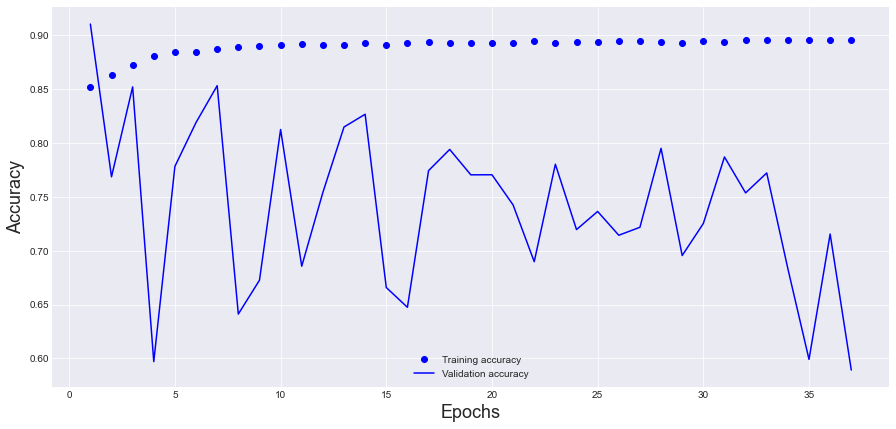

In [94]:
# Accuracy graphs during training

history_dict = history.history
plt.style.use('seaborn-darkgrid') 
accuracy_values = history_dict['accuracy']

val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()
plt.show()

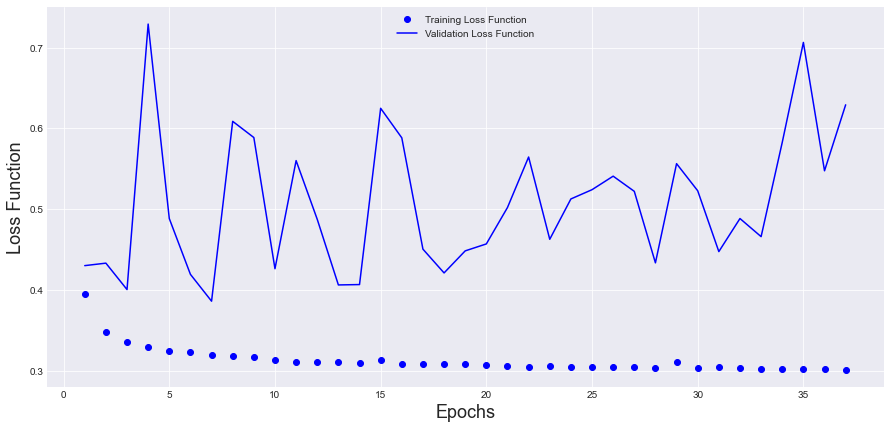

In [97]:
# Loss-function graphs during training (binary_crossentropy)

history_dict = history.history
plt.style.use('seaborn-darkgrid') 
accuracy_values = history_dict['loss']

val_accuracy_values = history_dict['val_loss']

epochs = range(1, len(accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_values, 'bo', label='Training Loss Function')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Loss Function')
plt.xlabel('Epochs', size=18)
plt.ylabel('Loss Function', size=18)
plt.legend()
plt.show()


#### Evaluation and load the saved model

In [98]:
model = keras.models.load_model('model_Trend-Flat_loss_Batch200_Epoch100_Pat30_lstm-007_acc-0.85328_loss-0.38619.h5')

In [99]:
# Evaluation
scores = model.evaluate(X_test, y_test, verbose=0)

In [100]:
scores

[0.4131702780723572,
 0.8316642642021179,
 0.9612219333648682,
 0.8571572303771973,
 0.4131702780723572]

### Gated Recurrent Unit (GRU) 

In [62]:
# Create GRU model

model = keras.Sequential([

    keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(200, 5)),
    
    keras.layers.GRU(64, activation=tf.nn.relu, dropout=0.1, recurrent_dropout=0.5),
    
    #keras.layers.Dense(1)
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
    
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 200, 32)           3744      
                                                                 
 gru_1 (GRU)                 (None, 64)                18816     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 22,625
Trainable params: 22,625
Non-trainable params: 0
_________________________________________________________________
None


#### Callbacks

In [63]:
es = EarlyStopping(monitor='val_binary_crossentropy', mode='min', patience=20, verbose=1)

In [64]:
mc = ModelCheckpoint('model_Trend-Flat_loss_Batch200_Epoch100_Pat30_gru-2Round-{epoch:03d}_acc-{val_accuracy:.5f}_loss-{val_binary_crossentropy:.5f}.h5', 
                     monitor='val_accuracy', mode='max', verbose=1, save_best_only=False)

### Compile the model

In [65]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss='binary_crossentropy', 
              metrics=['accuracy','Precision','Recall','binary_crossentropy'])  

### Trainig NN

In [66]:
history = model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.3, 
                    shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/100
147/147 [==============================] - ETA: 0s - loss: 0.4105 - accuracy: 0.8470 - precision: 0.8529 - recall: 0.9909 - binary_crossentropy: 0.4105
Epoch 1: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_gru-2Round-001_acc-0.87816_loss-0.38806.h5
147/147 [==============================] - 71s 451ms/step - loss: 0.4105 - accuracy: 0.8470 - precision: 0.8529 - recall: 0.9909 - binary_crossentropy: 0.4105 - val_loss: 0.3881 - val_accuracy: 0.8782 - val_precision: 0.9267 - val_recall: 0.9432 - val_binary_crossentropy: 0.3881
Epoch 2/100
147/147 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.8602 - precision: 0.8800 - recall: 0.9675 - binary_crossentropy: 0.3555
Epoch 2: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_gru-2Round-002_acc-0.57622_loss-0.59138.h5
147/147 [==============================] - 69s 468ms/step - loss: 0.3555 - accuracy: 0.8602 - precision: 0.8800 - recall: 0.9675 - binary_crossentropy: 0.3555 - val

Epoch 16/100
147/147 [==============================] - ETA: 0s - loss: 0.3016 - accuracy: 0.8943 - precision: 0.9151 - recall: 0.9652 - binary_crossentropy: 0.3016
Epoch 16: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_gru-2Round-016_acc-0.75719_loss-0.47226.h5
147/147 [==============================] - 80s 545ms/step - loss: 0.3016 - accuracy: 0.8943 - precision: 0.9151 - recall: 0.9652 - binary_crossentropy: 0.3016 - val_loss: 0.4723 - val_accuracy: 0.7572 - val_precision: 0.9279 - val_recall: 0.8004 - val_binary_crossentropy: 0.4723
Epoch 17/100
147/147 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.8940 - precision: 0.9149 - recall: 0.9651 - binary_crossentropy: 0.3009
Epoch 17: saving model to model_Trend-Flat_loss_Batch200_Epoch100_Pat30_gru-2Round-017_acc-0.66563_loss-0.61125.h5
147/147 [==============================] - 75s 512ms/step - loss: 0.3009 - accuracy: 0.8940 - precision: 0.9149 - recall: 0.9651 - binary_crossentropy: 0.3009 -

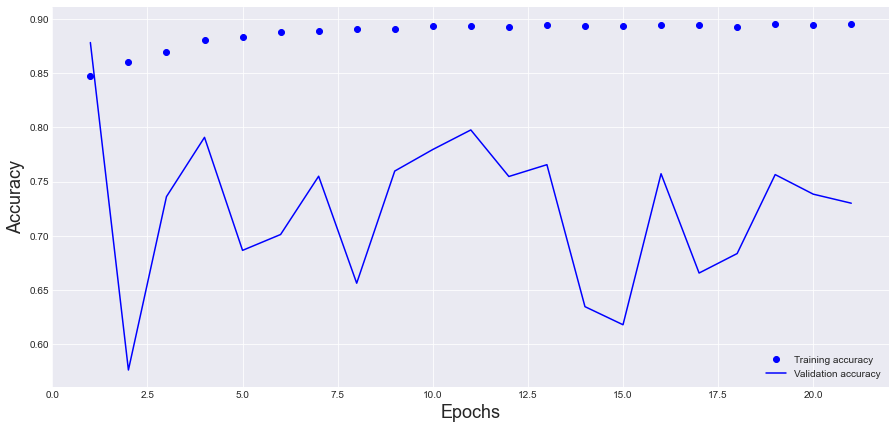

In [67]:
# Accuracy graphs during training

history_dict = history.history
plt.style.use('seaborn-darkgrid') 
accuracy_values = history_dict['accuracy']

val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()
plt.show()

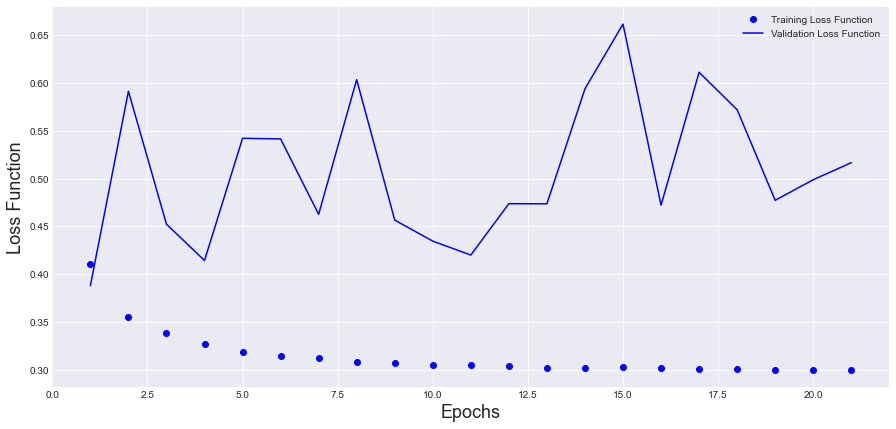

In [70]:
# Loss-function graphs during training (здесь: binary_crossentropy)

history_dict = history.history
plt.style.use('seaborn-darkgrid') 
accuracy_values = history_dict['loss']

val_accuracy_values = history_dict['val_loss']

epochs = range(1, len(accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_values, 'bo', label='Training Loss Function')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Loss Function')
plt.xlabel('Epochs', size=18)
plt.ylabel('Loss Function', size=18)
plt.legend()
plt.show()


### Evaluation and load the saved model

In [80]:
model = keras.models.load_model('model_Trend-Flat_loss_Batch200_Epoch100_Pat30_gru-2Round-004_acc-0.79073_loss-0.41440.h5')

In [81]:
# Evaluation
scores = model.evaluate(X_test, y_test, verbose=0)

In [82]:
scores

[0.4825732111930847,
 0.6927038431167603,
 0.9629680514335632,
 0.7031564116477966,
 0.4825732111930847]

In [83]:
model = keras.models.load_model('model_Trend-Flat_loss_Batch200_Epoch100_Pat30_gru-2Round-011_acc-0.79757_loss-0.42008.h5')

In [84]:
# Evaluation
scores = model.evaluate(X_test, y_test, verbose=0)

In [85]:
scores

[0.47247251868247986,
 0.7222698926925659,
 0.9630165696144104,
 0.7355247139930725,
 0.47247251868247986]